<a href="https://colab.research.google.com/github/edgardominguez23/Random-Walks-II/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Dominguez Murillo Edgar Alan

**e-mail:** edgar.dominguez5434@alumnos.udg.mx

## MODULES

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [ ]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.
* Visualizar con **plotly**.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [21]:
# Init variables
m = 3.0
levy_exponents = np.array([0.1, 0.5, 1.0, 1.9])
beta = 0.0

aux_domain = np.linspace(m-5, m+5, 400)

fig_Levy_pdf = go.Figure()

# Generate n stable Lévy distribution curves
for levy_exponent in levy_exponents:
  levy_pdf = np.array([levy_stable.pdf(i, alpha=levy_exponent, beta=beta, loc=m) for i in aux_domain])

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                       y = levy_pdf,
                                       marker = dict(size = 2),
                                       mode = 'lines',
                                       name = 'Levy_{}'.format(levy_exponent),
                                       showlegend = True))

fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.

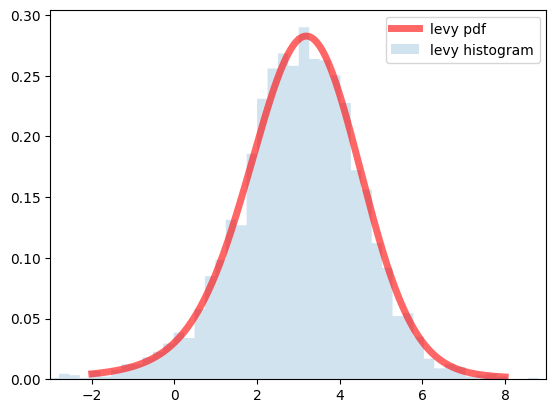

In [35]:
# Init variables
m = 3.0
alpha = 1.8
beta = -0.5
sample_size = 3500

# Create a vector of x values
x = np.linspace(-2, 8, sample_size)

# Create a figure
fig, ax = plt.subplots(1, 1)

# Plot the pdf of the Lévy distribution
ax.plot(x, levy_stable.pdf(x, alpha, beta, loc=m), 'r-', lw=5, alpha=0.6, label='levy pdf')

# Generate random samples from the Lévy distribution
r = levy_stable.rvs(alpha, beta, loc=m, size=sample_size)

# Create a histogram
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='levy histogram')
ax.set_xlim([x[0]-1, x[-1]+1])
ax.legend(loc='best')

#Show histogram + curve
plt.show()


## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.